In [5]:
# By Joely Nelson
# A very simple file demonstrating how to use the code in models.py

import numpy as np
import matplotlib.pyplot as plt
from models import *

def p(i):
    '''
    Returns a string representation of a number in a readable format surrounded by commas.
    NOTE: Is used by none of the functions, just happens to be kind of useful.
    '''
    return "{:,}".format(int(i))

In [6]:
def plot_simulation(v, start_date=None, show_s=True, show_e=True, show_i=True, show_r=True, show_d=True, show_v=True):
    colors = ["#63d297", "#ffe599", "#fc972d", "#6d9eeb", "#990000", "#351c75"]
    labels = ['Suceptible', 'Exposed', 'Infected', 'Recovered', 'Dead', 'Vaccinated']
    show_bools = [show_s, show_e, show_i, show_r, show_d, show_v]
    for i in range(6):
        if show_bools[i]:
            item = v.T[i]
            label = labels[i]
            color = colors[i]
            plt.plot(t, item, label=label, color=color)
    if start_date != None:
        plt.axvline(x=start_date, color='black', alpha=0.5, linestyle='dashed', label='Vac start date')
    plt.legend(loc='best')
    plt.show()
    plt.clf()

# Demo
No vaccination

Number dead:  5,341,793


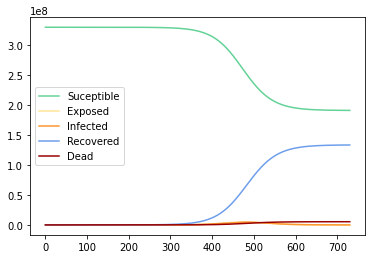

<Figure size 432x288 with 0 Axes>

In [7]:
# Example of simulating America:
# Model the us after 2 years without vaccination
t, v = simulate_region(total_pop=330222422, 
                    alpha=0.008, 
                    beta=0.27, 
                    eps=0.2,
                    gamma=0.2, 
                    vac_start_day=365*2, 
                    vac_rate=5e5, 
                    uptake_per=0.7, 
                    num_vac_days=0)   

# this is how to get out each of the individual values
S,E,I,R,D,V = v.T

print("Number dead: ", p(D[-1]))

# plotting
plot_simulation(v, show_v=False)

Vaccination begins after 419 days

Number dead:  3,630,051


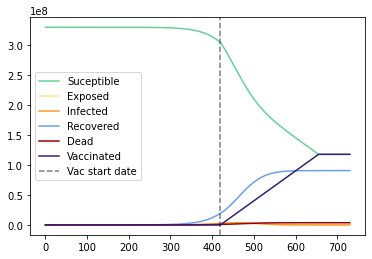

<Figure size 432x288 with 0 Axes>

In [8]:
# Example of simulating America:
# Vaccinations begin 419 days after the start of the pandemic.
t, v = simulate_region(total_pop=330222422, 
                    alpha=0.008, 
                    beta=0.27, 
                    eps=0.2,
                    gamma=0.2, 
                    vac_start_day=419, 
                    vac_rate=5e5, 
                    uptake_per=0.7, 
                    num_vac_days=311)   

# this is how to get out each of the individual values
S,E,I,R,D,V = v.T

print("Number dead: ", p(D[-1]))

# plotting
plot_simulation(v, 419)